In [1]:
import numpy as np
import pygmt
import math

In [2]:
def parse_input(filename):
    with open(filename, 'r') as fh:
        lines = fh.readlines()

    moves = []
    for line in lines:
        (move, num) = line.strip().split()
        for i in range(int(num)):
            moves.append(move)
    return moves

def compute_head_coordinates(moves, x0=0, y0=0):
    x = x0
    y = y0
    coordinates = [[x, y]]
    for move in moves:
        if move == 'R':
            x += 1
        if move == 'L':
            x -= 1
        if move == 'U':
            y += 1
        if move == 'D':
            y -= 1
        coordinates.append([x, y])
    return np.array(coordinates)

def round_up(x):
    if x==0.0:
        return 0.0
    else:
        aX = np.abs(x)
        return np.ceil(aX)*(aX/x)

def compute_tail_coordinates(head_coordinates, x0=0, y0=0):
    x = x0
    y = y0
    tail_coordinates = []
    for head_coordinate in head_coordinates:
        tail_coordinate_old = np.array([x, y])
        vector = head_coordinate - tail_coordinate_old
        norm = np.linalg.norm(vector)
        if norm <= math.sqrt(2):
            # Already touching, stay in place
            float_move = np.array([0, 0])
            int_move = np.array([0, 0])
        else:
            # Move in direction of unit vector (but on integer grid)
            float_move = vector / np.linalg.norm(vector)
            int_move = np.array([round_up(float_move[0]), round_up(float_move[1])])
        tail_coordinate = tail_coordinate_old + int_move
        [x, y] = tail_coordinate
        tail_coordinates.append([x, y])
            
    return np.array(tail_coordinates, dtype='int')

def plot_coordinates(head, tail):
    if not np.shape(head) == np.shape(tail):
        print("coordinates do not match")
        return
    for i in range(np.shape(head)[0]):
        print(head[i], tail[i])

def count_positions_visited(coordinates):
    visited = []
    for coord in coordinates:
        if f"{coord[0]},{coord[1]}" not in visited:
            visited.append(f"{coord[0]},{coord[1]}")
    return(len(visited))

## Part 1

In [3]:
moves = parse_input('real_input.txt')

In [4]:
head_positions = compute_head_coordinates(moves)

In [5]:
tail_positions = compute_tail_coordinates(head_positions)

In [6]:
#plot_coordinates(head_positions, tail_positions)

In [7]:
count_positions_visited(tail_positions)

6026

## Part 2

In [8]:
moves = parse_input('real_input.txt')

In [9]:
num_knots = 9

In [10]:
head_positions = compute_head_coordinates(moves)

In [11]:
prev_knot_positions = head_positions
for i in range(num_knots):
    knot_positions = compute_tail_coordinates(prev_knot_positions)
    prev_knot_positions = knot_positions

In [12]:
count_positions_visited(prev_knot_positions)

2273

## Graphics

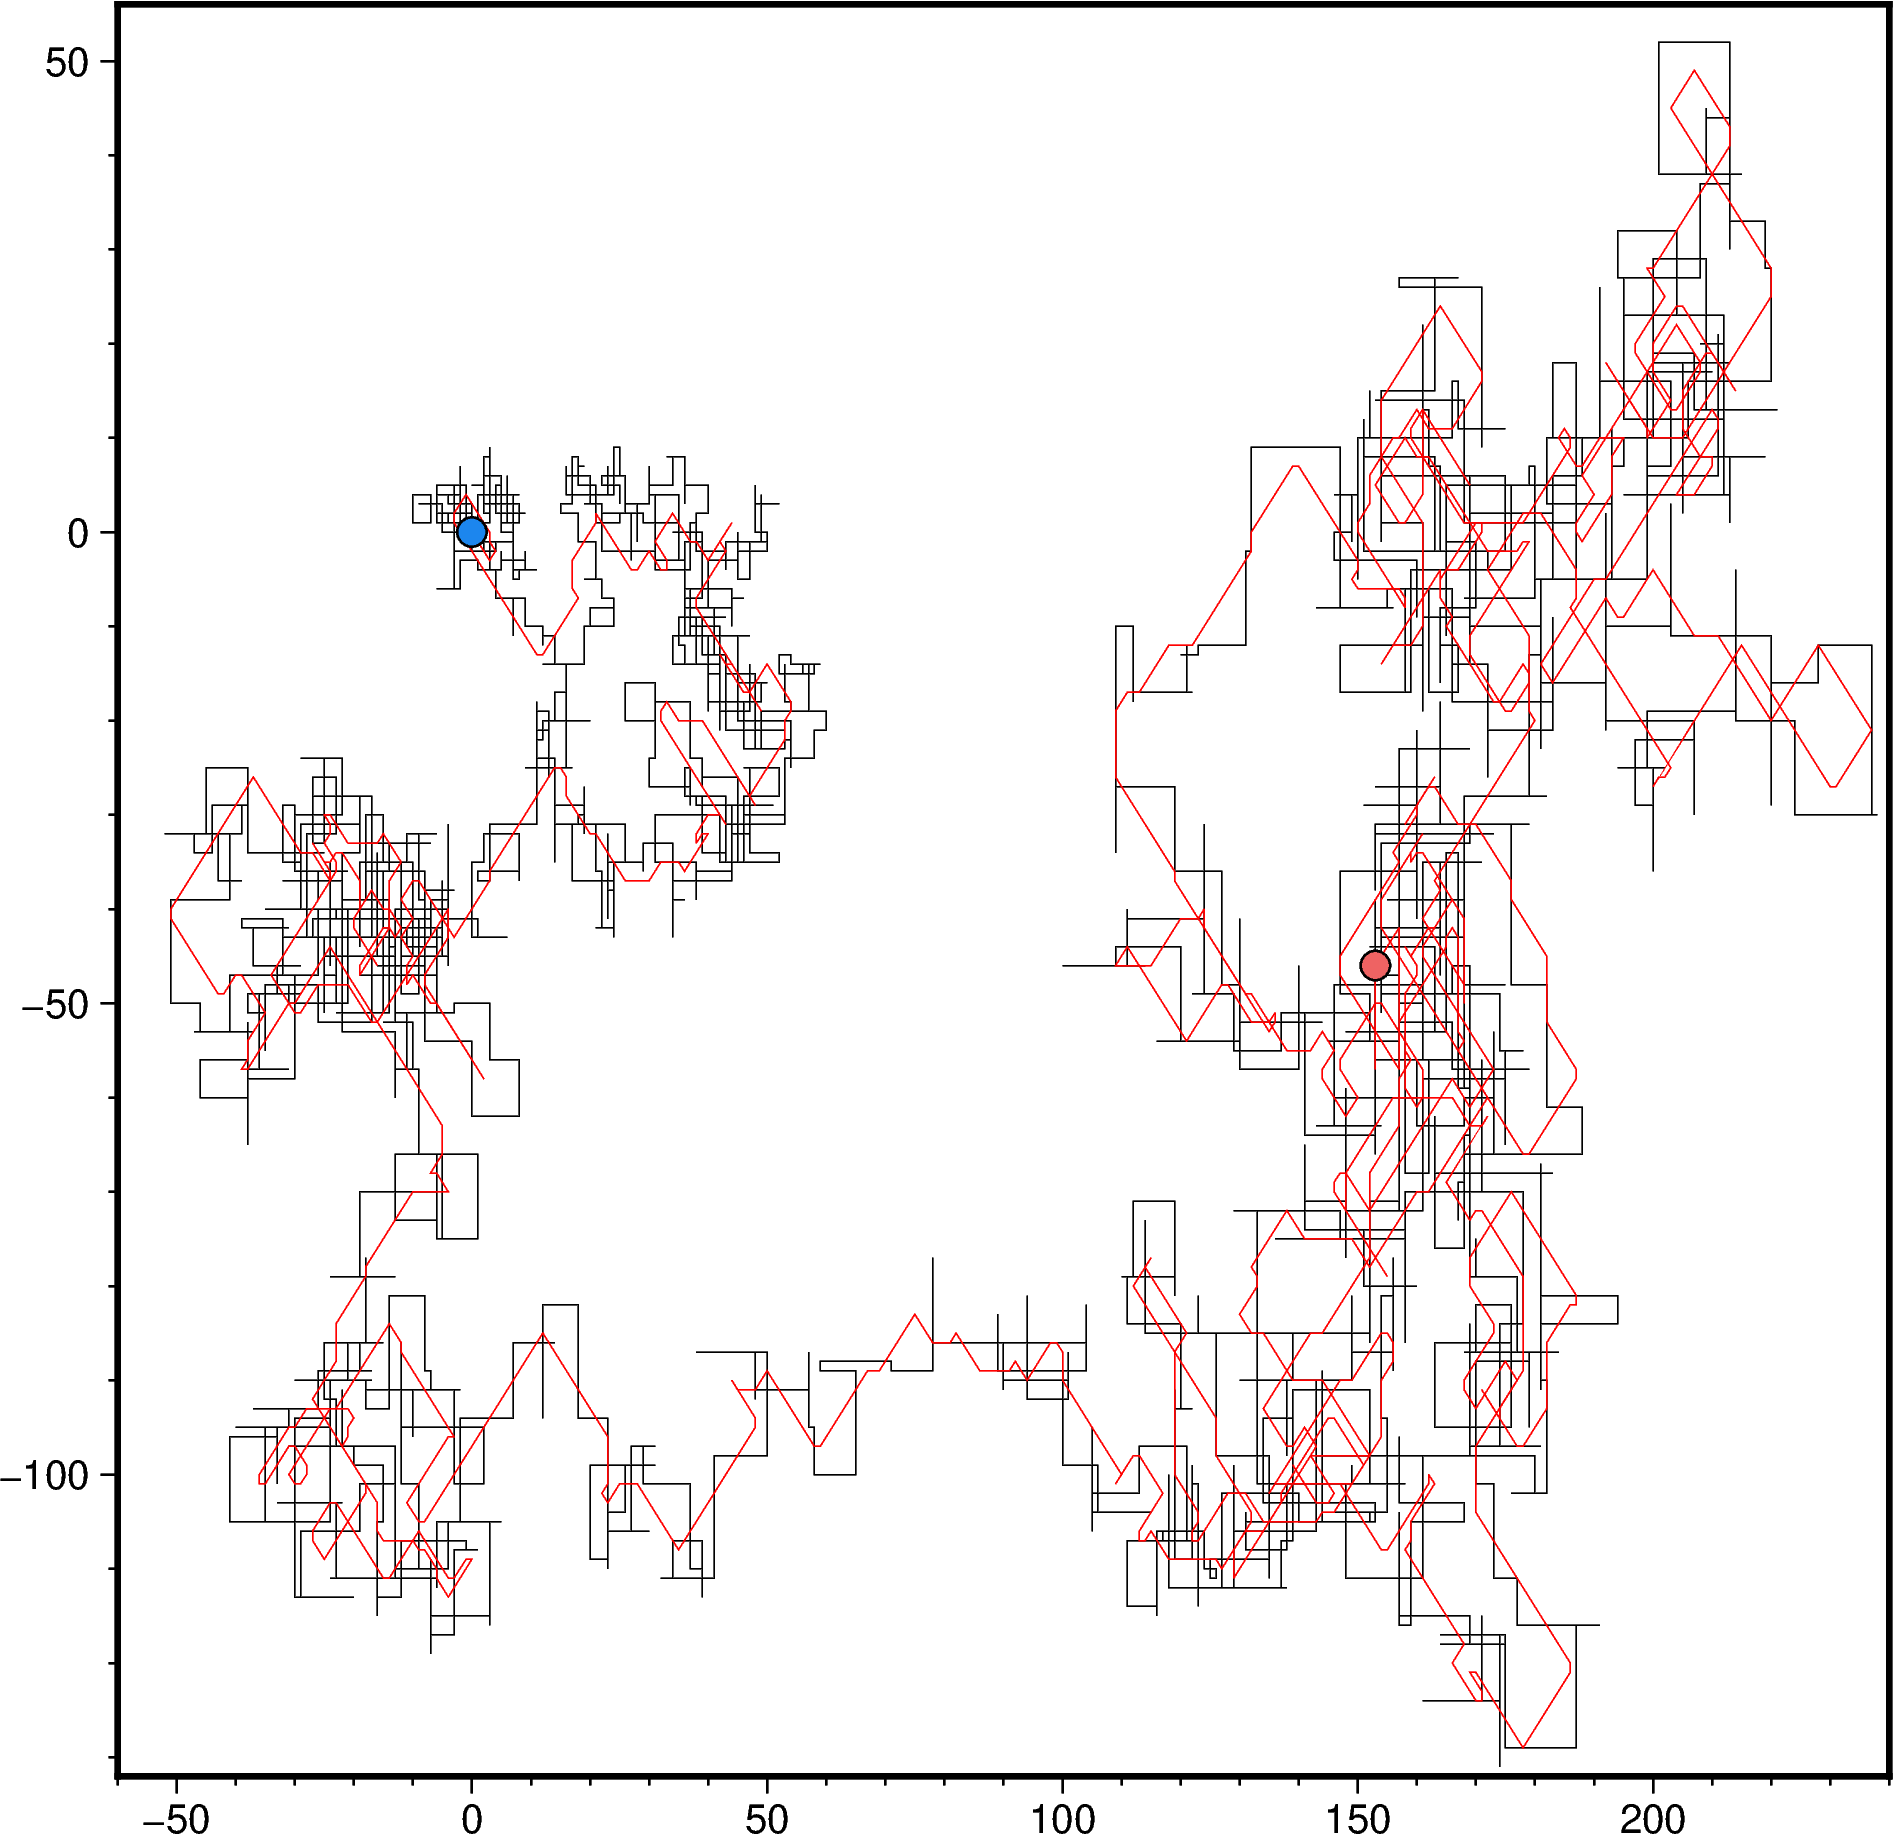

In [13]:
fig = pygmt.Figure()
# fig.plot(head_positions, style='c0.1c', color='black', frame=True)
fig.plot(head_positions, pen='0.25p,black', frame=True)
fig.plot(prev_knot_positions, pen='0.25p,red')
fig.plot(x=head_positions[0][0], y=head_positions[0][1], style='c0.25c', color='dodgerblue2', pen='0.5p,black')
fig.plot(x=head_positions[-1][0], y=head_positions[-1][1], style='c0.25c', color='indianred2', pen='0.5p,black')
fig.show()